In [1]:
#필터사이즈가 커지면 큰특징 작아지면 작은특징

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from sklearn import datasets
from sklearn.preprocessing import scale # 전처리중 스케일 : z점수
from tensorflow.python.framework import ops # framework.platform(cloud)
ops.reset_default_graph() # 그래프 초기화가 안되면 반복시 에러 
sess = tf.Session() # 네트워크 > GPU(CPU)
iris = datasets.load_iris() # 150 열이 4, TARGET 종속변수
num_pts = len(iris.data) # 행 : 150
num_feats = len(iris.data[0]) # 열개수 4 변수수 > FEATURE
k=3 # 그룹수
generations= 25 # 세대 epoch 와 같음 



In [3]:
val = [0,2,3]
val = tf.tile(val,[5]) # 똑같은 데이터를 반복해서 쌓음 > 현재 5번
print('홑일 때' , sess.run(val))
val = [[1,1,1],[2,2,2],[3,3,3]]
val = tf.tile(val,[5,2]) # 행으로 5번 열에 2번 쌓기
print("2차원일때" , sess.run(val))

홑일 때 [0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]
2차원일때 [[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


In [4]:
input_vecs = [[1. ,2.],[2. , 1.],[-2.,-1.]]
print("차원확대:" , sess.run(tf.expand_dims(input_vecs,0)))

input_vecs = [[1., 2.],[2. , 1.], [-2. , -1.]]
print("차원확대:" , sess.run(tf.expand_dims(input_vecs,1)))

차원확대: [[[ 1.  2.]
  [ 2.  1.]
  [-2. -1.]]]
차원확대: [[[ 1.  2.]]

 [[ 2.  1.]]

 [[-2. -1.]]]


In [5]:
# reshape, transpose(전치) , tile , expand_dims ( 차원 확대 )
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# Variable : 변동이 있는 수치를 저장 : 가중치
data_points = tf.Variable(iris.data) # 150 x 4
cluster_labels = tf.Variable(tf.zeros([num_pts], dtype=tf.int64)) # 150 개의 클러스터 번호


rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)]) # k=3 개의 그룹
# 150개중 하나 > 데이터중에서 중심값 결정 ,

#   [6.3 2.5 5.1 1.9]
#  [5.4, 3.7, 1.5, 0.2],
#  [5.4, 3.4, 1.7, 0.2],
centroids = tf.Variable(rand_starts) # 1 x 12 (그룹 3개 x 데이터값 4개) : 150 x 12 
centroid_matrix = tf.reshape(tf.tile(centroids,[num_pts,1]),[num_pts,k,num_feats]) # 150 x 12 의 데이터를 150 x 3 x 4 로 reshape
point_matrix = tf.reshape(tf.tile(data_points,[1,k]), [num_pts,k,num_feats]) 
# 150 x 3 x 4 의 데이터를 tile 하면 150x12 의 타일이 붙혀지는데 그 데이터를 다시 150 x 3 x 4 로 reshape 함

distances = tf.reduce_sum(tf.square(point_matrix - centroid_matrix), axis= 2) # 거리값 150x3 
centroid_group = tf.argmin(distances, 1) # distance 중 가장 작은

In [7]:
print(data_points)
print(cluster_labels)
print(rand_starts)
print(centroids)
print(centroid_matrix)
print(point_matrix)
print(distances)
print(centroid_group)

<tf.Variable 'Variable:0' shape=(150, 4) dtype=float64_ref>
<tf.Variable 'Variable_1:0' shape=(150,) dtype=int64_ref>
[[4.8 3.1 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.8 2.7 3.9 1.2]]
<tf.Variable 'Variable_2:0' shape=(3, 4) dtype=float64_ref>
Tensor("Reshape:0", shape=(150, 3, 4), dtype=float64)
Tensor("Reshape_1:0", shape=(150, 3, 4), dtype=float64)
Tensor("Sum:0", shape=(150, 3), dtype=float64)
Tensor("ArgMin:0", shape=(150,), dtype=int64)


In [8]:
def data_group_avg(group_ids , data) :
    # 150 x 4 (벡터의 더하기 연산은 요소별)
    sum_total = tf.unsorted_segment_sum(data, group_ids ,3)
    # 그룹별로 합계 3 에 대해  [x,x,x,x]
    # 150 x 4 그룹별 개수 카운트
    num_total = tf.unsorted_segment_sum(tf.ones_like(data), group_ids,3)
    # 3 [ x,x,x,x] 개수
    avg_by_group = sum_total/num_total # 중심값 계산
    return(avg_by_group)


means = data_group_avg(centroid_group, data_points)
update = tf.group(centroids.assign(means), cluster_labels.assign(centroid_group))
init = tf.global_variables_initializer()
sess.run(init)

In [38]:
for i in range(generations):
    print("세대 {}, 횟수{}.".format(i,generations))
    _, centroid_group_count = sess.run([update, centroid_group])
    group_count = [] 
    for ix in range(k):
        group_count.append(np.sum(centroid_group_count==ix))
    print("그룹수 : {}".format(group_count))
[centers, assignments] = sess.run([centroids, cluster_labels])

세대 0, 횟수25.
그룹수 : [44, 56, 50]
세대 1, 횟수25.
그룹수 : [48, 52, 50]
세대 2, 횟수25.
그룹수 : [53, 47, 50]
세대 3, 횟수25.
그룹수 : [56, 44, 50]
세대 4, 횟수25.
그룹수 : [59, 41, 50]
세대 5, 횟수25.
그룹수 : [61, 39, 50]
세대 6, 횟수25.
그룹수 : [61, 39, 50]
세대 7, 횟수25.
그룹수 : [61, 39, 50]
세대 8, 횟수25.
그룹수 : [61, 39, 50]
세대 9, 횟수25.
그룹수 : [61, 39, 50]
세대 10, 횟수25.
그룹수 : [61, 39, 50]
세대 11, 횟수25.
그룹수 : [61, 39, 50]
세대 12, 횟수25.
그룹수 : [61, 39, 50]
세대 13, 횟수25.
그룹수 : [61, 39, 50]
세대 14, 횟수25.
그룹수 : [61, 39, 50]
세대 15, 횟수25.
그룹수 : [61, 39, 50]
세대 16, 횟수25.
그룹수 : [61, 39, 50]
세대 17, 횟수25.
그룹수 : [61, 39, 50]
세대 18, 횟수25.
그룹수 : [61, 39, 50]
세대 19, 횟수25.
그룹수 : [61, 39, 50]
세대 20, 횟수25.
그룹수 : [61, 39, 50]
세대 21, 횟수25.
그룹수 : [61, 39, 50]
세대 22, 횟수25.
그룹수 : [61, 39, 50]
세대 23, 횟수25.
그룹수 : [61, 39, 50]
세대 24, 횟수25.
그룹수 : [61, 39, 50]


In [9]:
sess.run(centroid_group)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import random
import numpy as np
import random
from tensorflow.python.framework import ops
ops.reset_default_graph()

response = 6
batch_size = 50
symmetry = ['rotate180', 'rotate90', 'rotate270', 'flip_v', 'flip_h']

def print_board(board):
    symbols = ['O',' ','X']
    board_plus1 = [int(x) + 1 for x in board]
    print(' ' + symbols[board_plus1[0]] + ' | ' + symbols[board_plus1[1]]
          + ' | ' + symbols[board_plus1[2]])
    print('___________')
    print(' ' + symbols[board_plus1[3]] + ' | ' + symbols[board_plus1[4]]
          + ' | ' + symbols[board_plus1[5]])
    print('___________')
    print(' ' + symbols[board_plus1[6]] + ' | ' + symbols[board_plus1[7]]
          + ' | ' + symbols[board_plus1[8]])

def get_symmetry(board, response, transformation):
    if transformation == 'rotate180':
        new_response = 8 - response
        return(board[::-1], new_response)
   
    elif transformation == 'rotate90':
        new_response = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(response)
        tuple_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return([value for item in tuple_board for value in item],
               new_response)
   
    elif transformation == 'rotate270':
        new_response = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(response)
        tuple_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return([value for item in tuple_board for value in item],
               new_response)
   
    elif transformation == 'flip_v': # 0 1 2 , 3 4 5 , 6 7 8
        new_response = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(response)
        return(board[6:9] +  board[3:6] + board[0:3], new_response)
   
    elif transformation == 'flip_h': 
        new_response = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(response)
        new_board = board[::-1]
        return(new_board[6:9] +  new_board[3:6] + new_board[0:3],
               new_response)
    else:
        raise ValueError('해당하는 경우가 없음')

 

def get_moves_from_csv(csv_file):
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            moves.append(([int(x) for x in row[0:9]],int(row[9])))
    return(moves)

def get_rand_move(moves, n=1, rand_transforms=2):
    (board, response) = random.choice(moves)
    possible_transforms = ['rotate90', 'rotate180', 'rotate270',
                           'flip_v', 'flip_h']
    for i in range(rand_transforms):
        random_transform = random.choice(possible_transforms)
        (board, response) = get_symmetry(board, response, random_transform)
    return(board, response)


moves = get_moves_from_csv('tictactoe_moves.csv')
train_length = 500
train_set = []
print(train_set)

for t in range(train_length):
    train_set.append(get_rand_move(moves))
print(len(train_set))
print(train_set)
test_board = [-1, 0, 0, 1, -1, -1, 0, 0, 1]
train_set = [x for x in train_set if x[0] != test_board]
print(train_set)


def init_weights(shape):
    return(tf.Variable(tf.random_normal(shape)))


def model(X, A1, A2, bias1, bias2):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, A1), bias1))
    layer2 = tf.add(tf.matmul(layer1, A2), bias2)
    return(layer2)


X = tf.placeholder(dtype=tf.float32, shape=[None, 9])
Y = tf.placeholder(dtype=tf.int32, shape=[None])

A1 = init_weights([9, 81])  
bias1 = init_weights([81])  
A2 = init_weights([81, 9])  
bias2 = init_weights([9])
model_output = model(X, A1, A2, bias1, bias2)


loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output, 1)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
for i in range(10000):
    rand_indices = np.random.choice(range(len(train_set)), batch_size,
                                    replace=False)
    batch_data = [train_set[i] for i in rand_indices] 
    x_input = [x[0] for x in batch_data] # 종속변수 50개 결정
    y_target = np.array([y[1] for y in batch_data])
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})   
    temp_loss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    loss_vec.append(temp_loss)
    if i%500==0:
        print('iteration ' + str(i) + ' Loss: ' + str(temp_loss))


plt.plot(loss_vec, 'k-', label='Loss')
plt.title('Loss (MSE) ')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()
test_boards = [test_board]
feed_dict = {X: test_boards}
logits = sess.run(model_output, feed_dict=feed_dict)
predictions = sess.run(prediction, feed_dict=feed_dict)
print(predictions)

 


In [ ]:

test_boards = [test_board]
feed_dict = {X: test_boards}
logits = sess.run(model_output, feed_dict=feed_dict)
predictions = sess.run(prediction, feed_dict=feed_dict)
print(predictions)
def check(board):
    wins = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8],
            [0,4,8], [2,4,6]]
    for i in range(len(wins)):
        if board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==1.:
            return(1)
        elif board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==-1.:
            return(-1)
    return(0)


game_tracker = [0., 0., 0., 0., 0., 0., 0., 0., 0.]
win_logical = False
num_moves = 0                 
while not win_logical:
    player_index = input('이동하고 싶은 인덱스를 입력하시요 (0-8): ')
    num_moves += 1
    game_tracker[int(player_index)] = 1.
    [potential_moves] = sess.run(model_output,
                                 feed_dict={X: [game_tracker]})

    allowed_moves = [ix for ix,x in enumerate(game_tracker) if x==0.0]
    model_move = np.argmax([x if ix in allowed_moves else -999.0
                            for ix,x in enumerate(potential_moves)]) 
    game_tracker[int(model_move)] = -1.
    print('모델이 이동하였습니다.')
    print_board(game_tracker)
    if check(game_tracker)==1 or num_moves>=20:
        print('게임 종료! 승리하셨습니다.  ')
        win_logical = True
    elif check(game_tracker)== -1:
        print('게임 종료 ! 게임에 지셨습니다. !')
        win_logical = True

[[0. 0.]
 [0. 0.]]


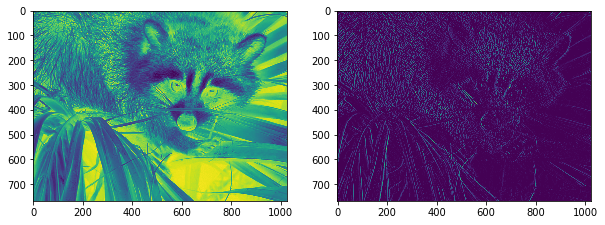

In [12]:
%matplotlib inline
import scipy as sp
import scipy.misc
import numpy as np 
import matplotlib.pylab as plt 
import scipy.ndimage
img = 255 - sp.misc.face(gray=True).astype(float) # 역컬러로 표현하기 위해서
k = np.zeros((2,2))
# 값ㅅ의 경계선을 찾는 필터
#k = [[0. 0.]
#    [0. 0.]]

k[:,0] = 1; k[:,1] = -1
# maximum > 이미지는 - 가 없음
img2 = np.maximum(0,sp.ndimage.filters.convolve(img,k)) # convolution : 정보통신 
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False) 
plt.show()


In [14]:
import tensorflow as tf 
def plot_image(image):
    plt.imshow(image, cmap="gray" , interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image,astype(np.uinit8), interpolation="nearest")
    plt.axis("off")
    
    


In [ ]:
# input shape :
- filter 는 4차원
- 필터 행,열,채널, 필터의 장수 
# conv2d
#4+D tensor with shape: batch_shape + (channels, rows, cols) 
#if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

#filter
shape= (7,7,1,2)

[[[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]]


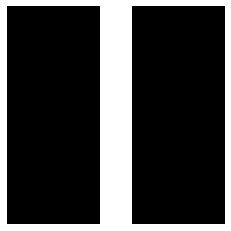

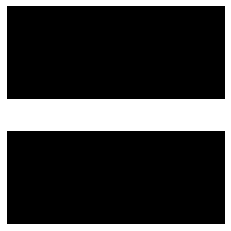

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [16]:
import numpy as np
import matplotlib.pylab as plt 
# 채널 == 컬러 
fmap = np.zeros(shape=(7,7,1,2), dtype=np.float32)
print(fmap)
fmap[:,3,0,0] = 1 
fmap[3,:,0,1] = 1 
fmap[:,:,0,0] 
plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()
print(fmap[:,:,0,0])

In [24]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220,130:250] # china image 일부 추출 
height, width, channels = image.shape 
print(image.shape) # (70.120.3) # 채널 last 로 값이 출력 == 컬러 3개 
image_grayscale = image.mean(axis=2).astype(np.float32) # RGB > grayscale > 70x120
images = image_grayscale.reshape(1,height,width,1) # 이미지의 입력형식


(70, 120, 3)


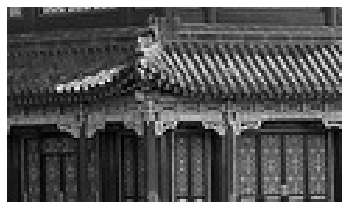

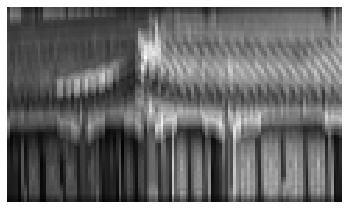

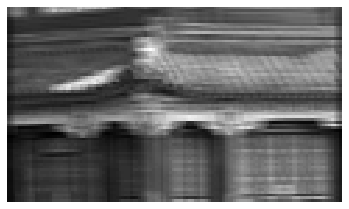

In [27]:
# 1, height, width, 1 : 배치사이즈 , 행 , 열 , 채널 
# 형식 일치 
from tensorflow.python.framework import ops
ops.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None,height,width,1))
feature_maps = tf.constant(fmap)
# 출력차수 == 입력차수를 동일하게 하라 
# VALID : padding 하지 말고 정당하게 계산
convolution = tf.nn.conv2d(X,feature_maps, strides=[1,1,1,1], padding="SAME", use_cudnn_on_gpu= False)

# 필터의 개수만큼 이미지가 생성 (이미지 특징을 추출)

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X:images})
   

plot_image(images[0,:,:,0])
plt.show()
plot_image(output[0,:,:,0]) # 열피터
plt.show()
plot_image(output[0,:,:,1]) # 행피터
plt.show()


In [36]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size , height, width, channels = dataset.shape
print(batch_size, height, width, channels)
print(output.shape)

convolution = tf.nn.conv2d(X, feature_maps , strides = [1,2,2,1], padding = "SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

2 427 640 3
(1, 70, 120, 2)


ValueError: Cannot feed value of shape (2, 427, 640, 3) for Tensor 'Placeholder_2:0', which has shape '(?, 427, 640, 1)'

2 427 640 3
(2, 214, 320, 2)


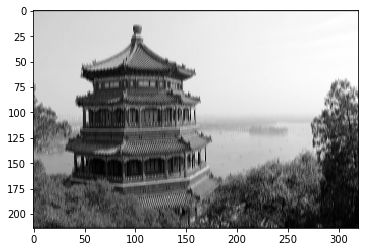

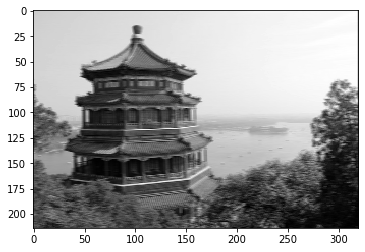

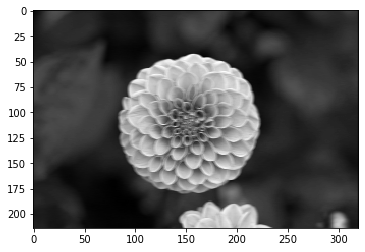

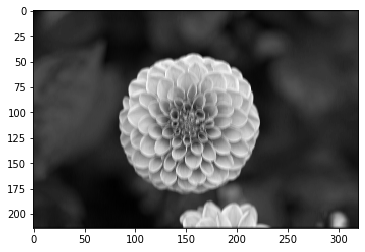

In [40]:
import numpy as np

from sklearn.datasets import load_sample_image

import tensorflow as tf

 

# 이미지 2장을 읽기

china = load_sample_image("china.jpg")

flower = load_sample_image("flower.jpg")
 

# china와 flower 이미지를 묶어버려요

dataset = np.array([china, flower], dtype=np.float32)

# channel last 형식으로 와요

batch_size, height, width, channels = dataset.shape
 

# 이미지 2장 칼라 3개

print(batch_size, height, width, channels) 

print(output.shape)


# 7x7x3x2 3은 채널 , 2는 장수

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

filters[:, 3, :, 0] = 1 # 세로

filters[3, :, :, 1] = 1 # 가로 

#

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

# strides[1,2,2,1] 은 행으로 2개 열로 2개 하라는의미 = 이미지 사이즈가 절반

convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:

    output = sess.run(convolution, feed_dict={X: dataset})

    # 이미지 2장 * 필터 2개 => 특징을 가진 이미지를 생성 : 4
    

plt.imshow(output[0, :, :, 0], cmap="gray")
plt.show()

plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

plt.imshow(output[1, :, :, 1], cmap="gray")
plt.show()

plt.imshow(output[1, :, :, 0], cmap="gray")
plt.show()



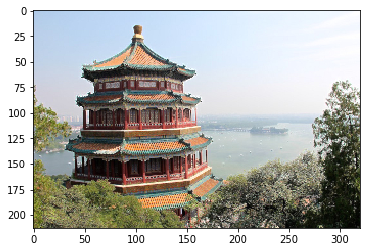

In [41]:
X =tf.placeholder(tf.float32, shape=(None , height, width, channels))
# 계산한대로 
# 행2 x 열2 :4개를 1개로 가장큰값으로 풀링(max,avg)
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1], strides=[1,2,2,1], padding = "VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))
plt.show()

In [43]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 신경망에서 target 은 onehotencoding 되어야함 
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


learning_rate = 0.001
num_steps = 500 # epcohs
batch_size = 128 # mini-batch : 전체데이터를 일정한 batch size 로 나누어서 전체 데이터를 학습에 참여
display_step = 10 

num_input = 784 # 데이터 입력사이즈 : 28x28 사이즈라고 생각하면됨
num_classes = 10 # 범주형 데이터인 target 이 10개
dropout = 0.75 # 과적합 방지 규제 계산식의 일부를 계산하지 않아도 적합한다.

X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probabilit


def conv2d(x, W, b, strides=1): # convolution 의 가중치는 filter 
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) # activation relu(0~ 무한대)


def maxpool2d(x, k=2):  # 4 > 1 줄임 
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

def conv_net(x, weights, biases, dropout):
    # -1 이면 계산한 나머지
    # 동일 사이즈 출력 
    # 훈련할때 입력되는 입력되는 데이터 사이즈  128(minibath로 들어오는 데잍어) x 28 x 28(이미지 사이즈) x 1(컬러) 
    
    x = tf.reshape(x, shape=[-1, 28, 28, 1]) # 이미지형식에서 특징을 추출    
    # 128 x 28 x 28 x 32 
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) # [5,5,1,32]  chanel 1 개인 5x5 이미지가 랜덤으로 초기화
    conv1 = maxpool2d(conv1, k=2) # 사이즈 반으로  128 x 14 x 14 x 32 > 이미지 사이즈만 반으로 줄음
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # [ 5,5,32,64]    
    conv2 = maxpool2d(conv2, k=2) # 사이즈 반으로  
    # 128 x 7 x 7 x 64
    ################################################ 앞은 convolution 연산 뒤는 행렬곱 (matmul)
    # 128 , 7*7*64
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    # 128 x 1024
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout) # 계산증가 일부회로 계산 생략
    
    # 128 x 10 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) # [1024, num_classes]
    return out # 최종적으로 나가는 사이즈 이미지 장수 (128) * 10 

weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, num_classes])) # 특징의 마지막
}

biases = { # 가중치 연산후의 최종사이즈와 동일
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# FFNN(feed forward neural network)
logits = conv_net(X, weights, biases, keep_prob) # minibatch 사이즈 * 10
prediction = tf.nn.softmax(logits) # 확률값으로 변경 > 값을 합하면 1 (전체확률값)

# 분류에서의 비용함수 

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y)) # 비용함수로 변경
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) # RMSProp(학습률) + momentum(관성) + 미분 (결과값을 저장)
# 가중치가 조절 :
train_op = optimizer.minimize(loss_op) # 학습완료


correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1)) # argmax 확률 가장 높은 minibatch사이즈 만큼 0,1,0,1 이나옴
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))  # 정확도

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size) # 500 번 학습 > 128장씩
        # placeholder 로 feeding
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("단계 " + str(step) + ",  Loss= " +
                  "{:.4f}".format(loss) + ",  Accuracy= " +
                  "{:.3f}".format(acc))

    print("최적화 종료")

    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                      Y: mnist.test.labels[:256],
                                      keep_prob: 1.0})) 

 

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000017B73C85188>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000017B000AEAC8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000017B000AEA48>)
단계 1,  Loss= 51214.3281,  Accuracy= 0.156
단계 10,  Loss= 26713.3340,  Accuracy= 0.203
단계 20,  Loss= 11178.2568,  Accuracy= 0.500
단계 30,  Loss= 7842.9961,  Accuracy= 0.664
단계 40,  Loss= 5487.1030,  Accuracy= 0.742
단계 50,  Loss= 5375.7344,  Accuracy= 0.789
단계 60,  Loss= 5216.3604,  Accuracy= 0.836
단계 70,  Loss= 4188.0098,  Accuracy= 0.797
단계 80,  Loss= 2145.5210,  Accuracy= 0.836
단계 90,  Loss= 1927.0408,  Accuracy= 0.883
단계 100,  Loss= 1369.9258,  Accuracy= 0.906
단계 110,  Loss= 3294.5776,  Accuracy

In [ ]:
# cnn (convolution neural network)
- imagenet에서 1등한 모델
- VGGNet , ResNet , Inceptionv3, EfficeintNet 
- vgg, resnet : 동영상처리 - 고속 
- Inceptionv3 는 width 로 확장하방법
EfficientNet
 - filter size
 - layer 깊게
 - image 해상도를 높이는 방법
 - 위 3가지를 조화로운 방법으로 개선

In [ ]:
(transfer learning ): 하나의 domain 에서 학습된 가중치를 다른 문제에 저닝해서 사용
    - 훈련된 가중치를 기반으로 새롭게 학습
    - 학습 속도가 빨라짐
    - 데이터 부족문제를 해결할수 있음
    - 더 정교하게 더 빠르게 
image augmentation
    - 이미지 증강
    - rotate , flip, clip ,데이터에 변형
    - 하드에서 이미지를 일정한 사이즈로 자동으로 로딩한 것을 